# KMeans Testing and Inference

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [22]:
image_path = '../output_videos/cropped_img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

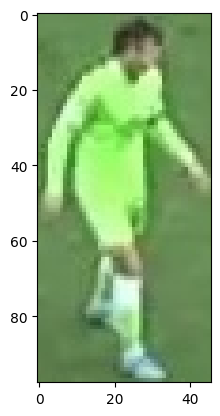

In [23]:
plt.imshow(image)
plt.show()

# Get top half of player

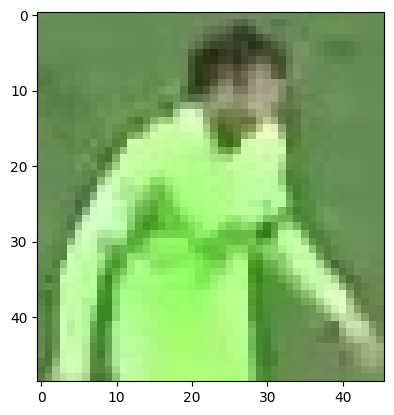

In [24]:
top_half = image[0:int(image.shape[0]/2), :]
plt.imshow(top_half)
plt.show()

# Cluster image into shirt and background

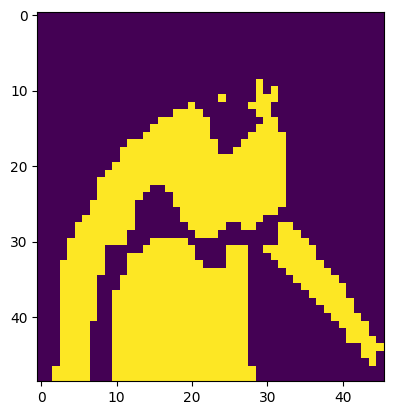

In [25]:
# flatten image
flattened_image = top_half.reshape(-1, 3)

# perform k-means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(flattened_image)

# get cluster labels
labels = kmeans.labels_

# reshape the clustered pixels into image shape
clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])

# display differentiatied areas
plt.imshow(clustered_image)
plt.show()

In [26]:
# KMeans() will randomly assign labels as 1 or 0 so the label for backgroun must be specifically defined
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1],clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
non_player_cluster

0

In [27]:
player_cluster = 1 - non_player_cluster
player_cluster

1

In [28]:
kmeans.cluster_centers_[player_cluster]

array([176.27651515, 242.42929293, 140.46338384])